Import the liblaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# The only columns we want to use for this project 

cols = [
    'id',
    'host_id',
    'zipcode',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listing_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]

data = pd.read_csv('listings.csv', usecols=cols, encoding='latin-1')

In [3]:
data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022-4175,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$160.00,3,21,62,86.0,1
1,1846722,2631556,NaN,Apartment,Entire home/apt,10,1.0,3.0,3.0,Real Bed,$105.00,1,28,22,85.0,2
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,$58.00,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$185.00,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,$195.00,1,30,1,100.0,1


In [4]:
data.dtypes

id                        int64
host_id                   int64
zipcode                  object
property_type            object
room_type                object
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
bed_type                 object
price                    object
minimum_nights            int64
availability_30           int64
number_of_reviews         int64
review_scores_rating    float64
host_listing_count        int64
dtype: object

1. Find the columns with missing values 
(Some of the best ways to do it)

In [5]:
# The most common way in order to view all the missing data in through each column is the below 
# However there is a new way, as you can see in the next 

data.isnull().sum()

id                         0
host_id                    0
zipcode                  162
property_type              6
room_type                  0
accommodates               0
bathrooms                463
bedrooms                 140
beds                      98
bed_type                   0
price                      0
minimum_nights             0
availability_30            0
number_of_reviews          0
review_scores_rating    8657
host_listing_count         0
dtype: int64

In [6]:
# The new way

for col in data.columns:
    print('The name of the column is  ' + col + '  ,The total number of Missing Values are:  ', len(data[col][data[col].isnull()]))

The name of the column is  id  ,The total number of Missing Values are:   0
The name of the column is  host_id  ,The total number of Missing Values are:   0
The name of the column is  zipcode  ,The total number of Missing Values are:   162
The name of the column is  property_type  ,The total number of Missing Values are:   6
The name of the column is  room_type  ,The total number of Missing Values are:   0
The name of the column is  accommodates  ,The total number of Missing Values are:   0
The name of the column is  bathrooms  ,The total number of Missing Values are:   463
The name of the column is  bedrooms  ,The total number of Missing Values are:   140
The name of the column is  beds  ,The total number of Missing Values are:   98
The name of the column is  bed_type  ,The total number of Missing Values are:   0
The name of the column is  price  ,The total number of Missing Values are:   0
The name of the column is  minimum_nights  ,The total number of Missing Values are:   0
The nam

In [7]:
# If you want to search for a specific column in our dataset 

len(data['zipcode'][data['zipcode'].isnull()])

162

In [8]:
# First new way 

missing_values = [col for col in data.columns if data[col].isnull().any()]
    
print('Here is the name of all data columns with missing data: \n',  missing_values)

Here is the name of all data columns with missing data: 
 ['zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']


In [9]:
# Second new way

data.columns[data.isna().any()].tolist()

['zipcode',
 'property_type',
 'bathrooms',
 'bedrooms',
 'beds',
 'review_scores_rating']

1. Remove NaN values from dataframe except review_scores_rating

In [10]:
original_data = len(data)

data = data.dropna(how = 'any', subset = ['zipcode', 'property_type', 'bedrooms', 'beds', 'bathrooms'])

print('Number of NaN values removed after the process are: ', original_data - len(data))

Number of NaN values removed after the process are:  769


1.1 Remove the $ symbol from our column price

In [11]:
data['price']

0        $160.00 
2         $58.00 
3        $185.00 
4        $195.00 
5        $165.00 
           ...   
27386    $190.00 
27388    $139.00 
27389     $99.00 
27390     $55.00 
27391    $110.00 
Name: price, Length: 26623, dtype: object

In [12]:
# Better way using regex

data['price'] = data['price'].replace(r'\$', '' ,regex=True)
data['price']

0        160.00 
2         58.00 
3        185.00 
4        195.00 
5        165.00 
          ...   
27386    190.00 
27388    139.00 
27389     99.00 
27390     55.00 
27391    110.00 
Name: price, Length: 26623, dtype: object

In [13]:
# Another way using numpy 

data['price'] = data['price'].replace("?", "np.Nan")
data['price']

0        160.00 
2         58.00 
3        185.00 
4        195.00 
5        165.00 
          ...   
27386    190.00 
27388    139.00 
27389     99.00 
27390     55.00 
27391    110.00 
Name: price, Length: 26623, dtype: object

2. Drop any invalid values in tha dataset

In [14]:
print ('Number of Accommodates 0:', len(data[data['accommodates'] == 0]))
print ('Number of Bedrooms 0:', len(data[data['bedrooms'] == 0]))
print ('Number of Beds 0:', len(data[data['beds'] == 0]))
print ('Number of Listings with Price $0.00:', len(data[data['price'] == 0.00]))

Number of Accommodates 0: 0
Number of Bedrooms 0: 2321
Number of Beds 0: 0
Number of Listings with Price $0.00: 0


3. Convert Zipcode to 5 digits

In [15]:
# This is how it looks now

data['zipcode']

0        10022-4175
2             11221
3             10011
4             10011
5             11231
            ...    
27386         10003
27388         10019
27389         10301
27390         11213
27391         10018
Name: zipcode, Length: 26623, dtype: object

In [16]:
# This way counts everything in the column even the - 

data['zipcode'].astype(str).str.len()

0        10
2         5
3         5
4         5
5         5
         ..
27386     5
27388     5
27389     5
27390     5
27391     5
Name: zipcode, Length: 26623, dtype: int64

In [17]:
# This way only count the digits of the column 

data['zipcode'].str.count('\d')

0        9
2        5
3        5
4        5
5        5
        ..
27386    5
27388    5
27389    5
27390    5
27391    5
Name: zipcode, Length: 26623, dtype: int64

In [18]:
# The old dataframe

data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022-4175,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.00,3,21,62,86.0,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.00,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.00,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.00,1,30,1,100.0,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.00,2,11,16,96.0,2


In [19]:
# The new dataframe after we converted the column 

data['zipcode'] = data['zipcode'].str.replace(r'-\d+', '')
data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.00,3,21,62,86.0,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.00,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.00,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.00,1,30,1,100.0,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.00,2,11,16,96.0,2


In [20]:
# ensure all zipcodes are of length 5

data = data[data['zipcode'].map(len) == 5]
data['zipcode'].value_counts().sum()

26619

In [21]:
print('Number of missing review scores ratings:', len(data['review_scores_rating'][data['review_scores_rating'].isnull()]))

Number of missing review scores ratings: 8489


3. Let's explore distribution of accommodates

In [22]:
print('Number of Unique Accomodation: ', np.unique(data['accommodates']))

Number of Unique Accomodation:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [23]:
for _ in range(1,17):
    print('Number of accomadation {}:'.format(_) , len(data[data['accommodates'] == _ ]))

Number of accomadation 1: 2704
Number of accomadation 2: 12907
Number of accomadation 3: 3315
Number of accomadation 4: 4585
Number of accomadation 5: 1004
Number of accomadation 6: 1224
Number of accomadation 7: 218
Number of accomadation 8: 333
Number of accomadation 9: 57
Number of accomadation 10: 119
Number of accomadation 11: 15
Number of accomadation 12: 43
Number of accomadation 13: 4
Number of accomadation 14: 14
Number of accomadation 15: 5
Number of accomadation 16: 72


In [24]:
# Groupby the accomadates by their id and after we will sort it

sort_data = data.groupby('accommodates').agg('count')['id']
sort_data

accommodates
1      2704
2     12907
3      3315
4      4585
5      1004
6      1224
7       218
8       333
9        57
10      119
11       15
12       43
13        4
14       14
15        5
16       72
Name: id, dtype: int64

In [25]:
sort_data.sort_values(ascending=False)

accommodates
2     12907
4      4585
3      3315
1      2704
6      1224
5      1004
8       333
7       218
10      119
16       72
9        57
12       43
11       15
14       14
15        5
13        4
Name: id, dtype: int64

5. Visualize distribution of price, accommodations, beds, and review_scores_rating respectively

5.1 Accommodations

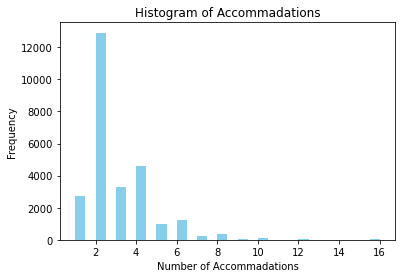

In [26]:
plt.hist(data['accommodates'], bins = 30, color = 'skyblue')
plt.title('Histogram of Accommadations')
plt.xlabel('Number of Accommadations')
plt.ylabel('Frequency')
plt.show()

As we can notice the majority of accomodations are for 1-4 people, and more specific for 2 and then for 4 people

5.2 Beds

First of all, we have to underastand the unique values of beds we have in our dataset and then to find out the accommodations for those

In [27]:
print('Number of Unique Beds: ', np.unique(data['beds']))

Number of Unique Beds:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16.]


In [28]:
for _ in range(1, 17):
    print('Beds {}:'.format(_), len(data[data['beds'] == _]))

Beds 1: 17831
Beds 2: 5865
Beds 3: 1801
Beds 4: 618
Beds 5: 244
Beds 6: 118
Beds 7: 41
Beds 8: 22
Beds 9: 3
Beds 10: 20
Beds 11: 4
Beds 12: 9
Beds 13: 1
Beds 14: 15
Beds 15: 0
Beds 16: 27


As we can notice,for instance the accommodations for 2 beds are 5865 but for 9 beds it's only 3 

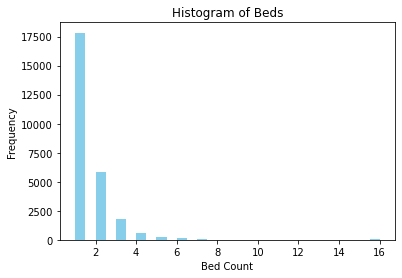

In [29]:
# Visualize the distribution of beds

plt.hist(data['beds'], bins = 30, color = 'skyblue')
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

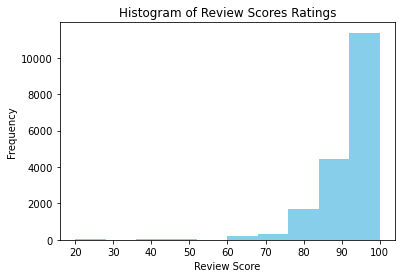

In [30]:
# Visualize distribution of review scores ratings

plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()], color = 'skyblue')
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

6. Convert NaN scores with 0 reviews into 'No Reviews'

In [31]:
idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()
data.loc[idx_vals, 'review_scores_rating'] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace(np.nan, 'No Reviews')

In [32]:
data.head(10)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.00,3,21,62,86.0,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.00,3,4,35,98.0,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.00,10,1,26,96.0,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.00,1,30,1,100.0,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.00,2,11,16,96.0,2
6,4832596,4148973,11207,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,80.00,1,29,0,No Reviews,1
7,2562510,13119459,10013,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,120.00,2,5,0,No Reviews,1
8,3005360,4421803,10003,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,150.00,1,30,14,96.0,4
9,2431607,4973668,11221,Apartment,Shared room,2,1.0,1.0,1.0,Real Bed,40.00,4,0,10,94.0,4
11,4833061,24879430,11221,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,75.00,1,2,0,No Reviews,1


In [33]:
# Check if we still have NaN values and if so we will remove them
data.isnull().sum()

id                        0
host_id                   0
zipcode                   0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
price                     0
minimum_nights            0
availability_30           0
number_of_reviews         0
review_scores_rating    282
host_listing_count        0
dtype: int64

In [34]:
data = data[~data['review_scores_rating'].isnull()]
data.isnull().sum()

id                      0
host_id                 0
zipcode                 0
property_type           0
room_type               0
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
bed_type                0
price                   0
minimum_nights          0
availability_30         0
number_of_reviews       0
review_scores_rating    0
host_listing_count      0
dtype: int64

7. Convert review_scores_rating into different buckets

In [35]:
data['review_scores_rating'].value_counts().sort_values(ascending=False)

No Reviews    8207
100.0         4431
90.0          1339
93.0          1312
80.0          1105
95.0          1055
96.0          1034
97.0           986
94.0           788
98.0           750
92.0           703
91.0           683
87.0           590
89.0           518
88.0           480
99.0           316
85.0           289
84.0           268
86.0           246
83.0           226
60.0           168
70.0           101
82.0           101
77.0            76
73.0            75
78.0            57
81.0            56
76.0            56
75.0            55
79.0            40
74.0            31
67.0            26
40.0            21
72.0            20
20.0            20
71.0            15
68.0            14
65.0            13
50.0            13
69.0            11
64.0             9
66.0             5
62.0             3
57.0             3
55.0             3
43.0             2
48.0             2
47.0             2
53.0             2
61.0             2
54.0             2
49.0             2
58.0        

In [36]:
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return '0'
    elif val >= 95.0:
        return '1'
    elif val >= 90.0 and val < 95.0:
        return '2'
    elif val >= 85.0 and val < 90.0:
        return '3'
    elif val >= 80.0 and val < 85.0:
        return '4'
    elif val >= 70.0 and val < 80.0:
        return '5'
    elif val >= 60.0 and val < 70.0:
        return '6'
    elif val >= 50.0 and val < 60.0:
        return '7'
    elif val >= 40.0 and val < 50.0:
        return '8'
    elif val >= 30.0 and val < 40.0:
        return '9'
    elif val >= 20.0 and val < 30.0:
        return '10'
    elif val >= 10.0 and val < 20.0:
        return '11'
    elif val < 10.0:
        return '12'

In [37]:
data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)
data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.00,3,21,62,3,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.00,3,4,35,1,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.00,10,1,26,1,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.00,1,30,1,1,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.00,2,11,16,1,2


8. Encode categorical variables

In [38]:
property_dummies = pd.get_dummies(data['property_type']).astype(int)
room_type = pd.get_dummies(data['room_type']).astype(int)
bed_type = pd.get_dummies(data['bed_type']).astype(int)

In [39]:
data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,160.00,3,21,62,3,1
2,2061725,4601412,11221,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,58.00,3,4,35,1,4
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,185.00,10,1,26,1,1
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,195.00,1,30,1,1,1
5,68914,343302,11231,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,165.00,2,11,16,1,2


In [40]:
data = pd.get_dummies(data, columns=["property_type", "room_type",'bed_type'], 
               prefix=["property", "room",'bed_type']).head()

In [41]:
data.columns.tolist()

['id',
 'host_id',
 'zipcode',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'availability_30',
 'number_of_reviews',
 'review_scores_rating',
 'host_listing_count',
 'property_Apartment',
 'property_Bed & Breakfast',
 'property_Boat',
 'property_Cabin',
 'property_Camper/RV',
 'property_Castle',
 'property_Cave',
 'property_Chalet',
 'property_Dorm',
 'property_Earth House',
 'property_House',
 'property_Hut',
 'property_Lighthouse',
 'property_Loft',
 'property_Other',
 'property_Tent',
 'property_Treehouse',
 'property_Villa',
 'room_Entire home/apt',
 'room_Private room',
 'room_Shared room',
 'bed_type_Airbed',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa',
 'bed_type_Real Bed']

10. Convert non-categorical variables to floats and normalize

In [42]:
def normalize(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)
    


non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 
                'host_listing_count', 'availability_30', 'minimum_nights']


for col in non_cat_vars:
    data[col] = data[col].astype(float)
    data[col] = normalize(data[col])

In [43]:
data.head()

,id,host_id,zipcode,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_30,...,property_Treehouse,property_Villa,room_Entire home/apt,room_Private room,room_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,1069266,5867023,10022,-0.5,1.0,-0.5,-1.069045,160.00,-0.250982,0.704913,...,0,0,1,0,0,0,0,0,0,1
2,2061725,4601412,11221,-0.5,1.0,-0.5,0.267261,58.00,-0.250982,-0.871867,...,0,0,0,1,0,0,0,0,0,1
3,44974,198425,10011,-0.5,1.0,-0.5,-1.069045,185.00,1.945113,-1.150122,...,0,0,1,0,0,0,0,0,0,1
4,4701675,22590025,10011,-0.5,1.0,-0.5,0.267261,195.00,-0.878438,1.539679,...,0,0,1,0,0,0,0,0,0,1
5,68914,343302,11231,2.0,1.0,2.0,1.603567,165.00,-0.564710,-0.222604,...,0,0,1,0,0,0,0,0,0,1


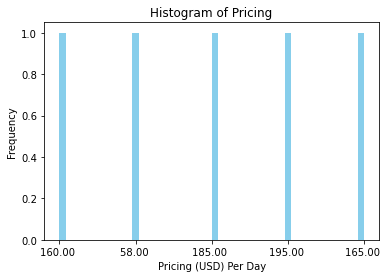

In [44]:
# Visualize distribution of price (target variable)

plt.hist(data['price'], bins=50, color = 'skyblue')
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()